## Linear Regression for Air Quality Index Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
data = pd.read_pickle("./data/data_air_quality_index.pkl")

In [3]:
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [4]:
data.shape

(1093, 9)

In [5]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
predictions = linear_model.predict(X_test)

In [9]:
pd.Series(linear_model.coef_, index=X.columns).sort_values(ascending=False)

TM      1.800671
VM      0.417563
SLP    -0.708275
H      -1.174952
V      -2.474804
T      -3.938946
Tm     -4.375279
VV    -37.356339
dtype: float64

In [10]:
y_test[:5]

851      28.750000
906     284.166667
1027     26.833333
285      81.125000
653      70.583333
Name: PM 2.5, dtype: float64

In [11]:
predictions[:5]

array([ 13.02249289, 215.27702462,  84.51300236,  51.78744986,
        -5.1882062 ])

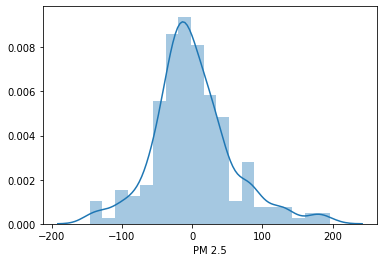

In [12]:
sns.distplot(y_test-predictions)
plt.show()

In [13]:
linear_model.score(X_train, y_train)

0.5306782449191885

In [14]:
linear_model.score(X_test, y_test)

0.5344318213641259

In [15]:
linear_model.coef_

array([ -3.93894611,   1.80067101,  -4.37527853,  -0.70827498,
        -1.17495199, -37.35633867,  -2.47480433,   0.41756288])

In [16]:
np.sqrt(mean_squared_error(y_test, predictions))

56.91216681400212

In [17]:
(y_test-predictions).var()

3253.0464924425555

2.1 Analysis of Factors Affecting the AQI of Delhi

New Delhi is among the most polluted cities in the world today. Air pollution is responsible for many
health problems in the urban areas. Of late, the air pollution status in Delhi has undergone many
changes in terms of the levels of pollutants and the control measures taken to reduce them. The
situation worsens during the onset of winters every year from October onwards. There are various
causes contributing to the current state of air pollution in Delhi.
There were conflicting reports on media on the actual cause of air pollution in New Delhi. Through
this study we hope to develop some insights that can help organizations (State/Central Pollution
Control Boards and NGOs) to advocate more stringent policy frame work to control air pollution.
There are multiple factors which affects the air quality, such as: stubble burning in NCR, construction
activities, vehicular movement, firecrackers, industrial pollution, diesel gensets, etc. But, the data for
all of these is not available readily. We could collate the metrological data from CPCB & an estimate
of vehicular traffic through google maps, & thus decided to restrict our study only to these two
sources of data.
An estimate of pollution caused by vehicular movement can be studied if the data on vehicles
running on road at any given point of time is available. However, Google Maps provide only data in
terms of time it takes to move from point A to point B. Since, the speed of vehicles on road majorly
depends on the density of vehicles, we decided to take speed of vehicles as an estimate of vehicular
density. The same was calculated using the time & distance we got from the google maps.
Keywords: Air Pollution, Metrological Data, Vehicular Movement

### Apply ML algorithms
- Linear Regression
- Lasso Regression
- Decision Tree Regressor
- KNN Regressor
- RandomForestRegressor
- Xgboost Regressor
- Huperparameter Tuning
- ANN- Artificial Neural Network


### Data Source : https://en.tutiempo.net/